In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from numpy.random import randn
plt.rcParams["font.family"] = "Times New Roman"
from pylab import savefig

In [531]:
data = pd.read_csv('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/TDS DB MD All BMI.csv', header=0)
#data = pd.read_csv('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/TDS DB MD All BMI.csv', header=0)
#, usecols = ['EnergyAll','CarbohydrateAll', 'ProteinAll', 'TotalFatsAll']

In [532]:
data.head()

,N,Q1,District,Region,UrbanRural,YearOfBirth,Gender,Height,Weight,Education,...,n22301_TotalFats,n22303_TotalFats,n22304_TotalFats,n22305_TotalFats,EnergyAll,CarbohydrateAll,ProteinAll,TotalFatsAll,BMI,BMIGroups
0,1,Yes,Shengavit,Yerevan,Yerevan,1973,Female,175,95,Higher education,...,,,,,1701.3478,214.31764,42.72178,73.57452,31.0204081632653,Obese
1,2,Yes,Erebuni,Yerevan,Yerevan,1987,Male,168,77,Higher education,...,,,,,1088.5750,151.87200,54.87300,27.89350,27.281746031746,Overweight
2,3,Yes,Achapnyak,Yerevan,Yerevan,1979,Female,156,72,Higher education,...,,,,,1256.6700,129.11900,28.27200,68.13200,29.585798816568,Overweight
3,4,Yes,Nor Nork,Yerevan,Yerevan,1977,Female,173,78,Higher education,...,,,,,1657.1200,154.41600,57.34350,88.43500,26.0616793076949,Overweight
4,5,Yes,Qanaqer-Zeytun,Yerevan,Yerevan,1984,Female,163,58,Higher education,...,,,,,164.0230,21.98200,9.71590,4.07920,21.8299521999323,Normal


In [533]:
data.shape

(1400, 937)

In [534]:
data.dtypes

N                    int64
Q1                  object
District            object
Region              object
UrbanRural          object
                    ...   
CarbohydrateAll    float64
ProteinAll         float64
TotalFatsAll       float64
BMI                 object
BMIGroups           object
Length: 937, dtype: object

In [535]:
data['EnergyAll']=pd.to_numeric(data['EnergyAll'], errors='coerce')
data['BMI']=pd.to_numeric(data['BMI'], errors='coerce')


In [536]:
data.dtypes

N                    int64
Q1                  object
District            object
Region              object
UrbanRural          object
                    ...   
CarbohydrateAll    float64
ProteinAll         float64
TotalFatsAll       float64
BMI                float64
BMIGroups           object
Length: 937, dtype: object

In [537]:
data.describe()

,N,YearOfBirth,n203_Energy,EnergyAll,CarbohydrateAll,ProteinAll,TotalFatsAll,BMI
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1384.000000
mean,700.5000,1976.284286,5.502857,1915.867327,227.855311,82.398554,77.678786,25.141194
std,404.2895,17.122334,28.605197,1063.016864,127.551091,63.536615,55.873540,4.555176
min,1.0000,1928.000000,0.000000,33.320000,2.283000,2.150000,0.392000,14.197531
25%,350.7500,1963.000000,0.000000,1217.173575,139.627697,43.320880,38.834125,21.799308
50%,700.5000,1979.000000,0.000000,1738.171950,203.767500,69.475324,69.008840,24.816327
75%,1050.2500,1991.000000,0.000000,2433.311710,293.347255,104.257830,103.739860,27.915519
max,1400.0000,2003.000000,288.000000,16090.180000,852.582000,947.037770,1010.320000,46.020761


<AxesSubplot:ylabel='EnergyAll'>

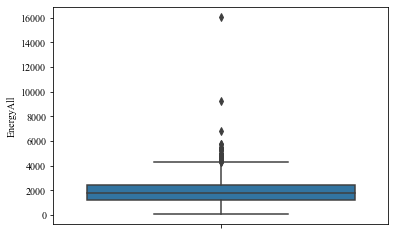

In [538]:
sns.boxplot(y=data['EnergyAll'])
#data.boxplot('EnergyAll')


<AxesSubplot:ylabel='CarbohydrateAll'>

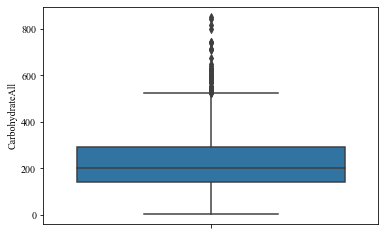

In [539]:
sns.boxplot(y=data['CarbohydrateAll'])
#data.boxplot('CarbohydrateAll')

<AxesSubplot:ylabel='ProteinAll'>

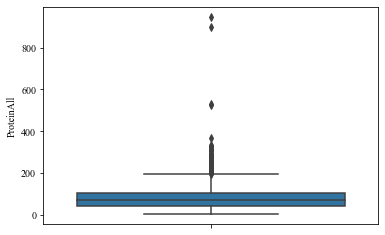

In [540]:
sns.boxplot(y=data['ProteinAll'])
#data.boxplot('ProteinAll')

<AxesSubplot:ylabel='TotalFatsAll'>

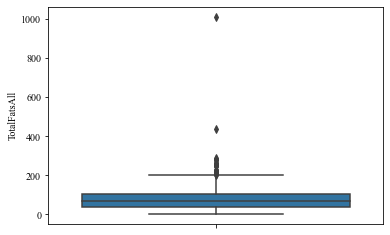

In [541]:
sns.boxplot(y=data['TotalFatsAll'])
#data.boxplot('TotalFatsAll')

<AxesSubplot:ylabel='BMI'>

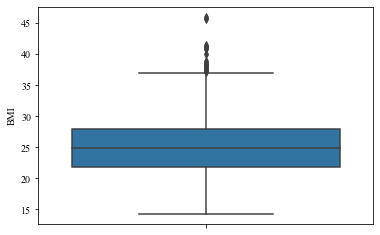

In [542]:
sns.boxplot(y=data['BMI'])
#data.boxplot('BMI')

In [543]:
#shapiro(data['CarbohydrateAll'])

In [544]:
data['n101_Energy'].describe()

count     1400
unique      13
top           
freq      1100
Name: n101_Energy, dtype: object

In [545]:
data['n203_Energy'].describe()

count    1400.000000
mean        5.502857
std        28.605197
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       288.000000
Name: n203_Energy, dtype: float64

# IQR

In [546]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [547]:
index_list = []

for feature in ['CarbohydrateAll', 'ProteinAll', 'TotalFatsAll']:
    index_list.extend(outliers(data, feature))

In [548]:
print(index_list)

[23, 272, 298, 443, 459, 469, 471, 481, 482, 532, 553, 554, 573, 584, 585, 609, 628, 660, 661, 685, 709, 725, 735, 812, 815, 880, 881, 882, 909, 913, 921, 962, 987, 1104, 1148, 1193, 1217, 1254, 1262, 1268, 1271, 1274, 1306, 1314, 1316, 1339, 1340, 1360, 7, 15, 37, 56, 120, 175, 183, 184, 253, 274, 295, 298, 299, 339, 387, 393, 395, 443, 459, 467, 468, 481, 487, 489, 517, 522, 528, 543, 549, 584, 634, 686, 706, 709, 754, 766, 880, 920, 994, 996, 998, 1147, 1158, 1168, 1200, 1203, 1212, 1230, 1249, 1253, 1255, 1261, 1271, 1273, 1274, 1284, 1297, 1316, 1353, 1368, 7, 23, 135, 274, 288, 438, 443, 480, 481, 490, 532, 549, 584, 641, 646, 685, 686, 688, 725, 751, 780, 841, 880, 887, 1033, 1041, 1130, 1186, 1193, 1200, 1254, 1273, 1284]


In [549]:
print(len(index_list))

141


In [550]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [551]:
data_cleaned = remove(data, index_list)
data_cleaned.head()

,N,Q1,District,Region,UrbanRural,YearOfBirth,Gender,Height,Weight,Education,...,n22301_TotalFats,n22303_TotalFats,n22304_TotalFats,n22305_TotalFats,EnergyAll,CarbohydrateAll,ProteinAll,TotalFatsAll,BMI,BMIGroups
0,1,Yes,Shengavit,Yerevan,Yerevan,1973,Female,175,95,Higher education,...,,,,,1701.3478,214.31764,42.72178,73.57452,31.020408,Obese
1,2,Yes,Erebuni,Yerevan,Yerevan,1987,Male,168,77,Higher education,...,,,,,1088.5750,151.87200,54.87300,27.89350,27.281746,Overweight
2,3,Yes,Achapnyak,Yerevan,Yerevan,1979,Female,156,72,Higher education,...,,,,,1256.6700,129.11900,28.27200,68.13200,29.585799,Overweight
3,4,Yes,Nor Nork,Yerevan,Yerevan,1977,Female,173,78,Higher education,...,,,,,1657.1200,154.41600,57.34350,88.43500,26.061679,Overweight
4,5,Yes,Qanaqer-Zeytun,Yerevan,Yerevan,1984,Female,163,58,Higher education,...,,,,,164.0230,21.98200,9.71590,4.07920,21.829952,Normal


In [552]:
data_cleaned.shape

(1286, 937)

In [553]:
data_cleaned['n203_Energy'].describe()

count    1286.000000
mean        5.542768
std        28.784496
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       288.000000
Name: n203_Energy, dtype: float64

In [554]:
data_cleaned.describe()

,N,YearOfBirth,n203_Energy,EnergyAll,CarbohydrateAll,ProteinAll,TotalFatsAll,BMI
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1271.000000
mean,694.918351,1976.341369,5.542768,1738.787144,209.573129,71.506149,69.918826,25.044980
std,405.398032,17.216749,28.784496,788.235467,102.825203,38.626564,41.435756,4.488652
min,1.000000,1928.000000,0.000000,33.320000,2.283000,2.150000,0.392000,14.197531
25%,339.500000,1963.000000,0.000000,1173.757700,133.960855,41.604905,36.618825,21.719250
50%,698.500000,1979.000000,0.000000,1643.244800,194.915000,65.444522,65.613440,24.801587
75%,1045.750000,1991.000000,0.000000,2270.204250,274.217090,95.352647,97.556335,27.772111
max,1400.000000,2003.000000,288.000000,4061.293550,522.910520,195.259720,198.569000,45.638809


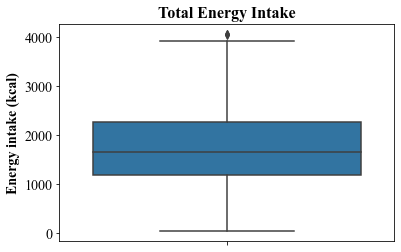

In [555]:
b1 = sns.boxplot(y=data_cleaned['EnergyAll'])
b1.set_title('Total Energy Intake', fontsize = 16, weight='bold')
b1.set_ylabel('Energy intake (kcal)', fontsize = 14, weight='bold')
b1.tick_params(labelsize=14)
#b1.get_figure().savefig("/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/b1.png")
#b1.get_figure().savefig("C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/b1.png")
#data_cleaned.boxplot('EnergyAll')

NameError: name 'b' is not defined

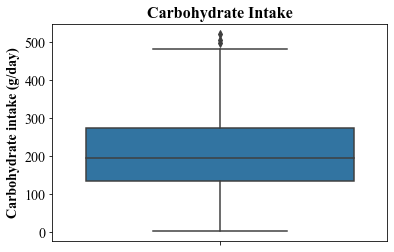

In [556]:
b2 = sns.boxplot(y=data_cleaned['CarbohydrateAll'])
b2.set_title('Carbohydrate Intake', fontsize = 16, weight='bold')
b2.set_ylabel('Carbohydrate intake (g/day)', fontsize = 14, weight='bold')
b2.tick_params(labelsize=14)
#b2.get_figure().savefig("/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/b2.png")
b#2.get_figure().savefig("C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/b2.png")
#data_cleaned.boxplot('CarbohydrateAll')

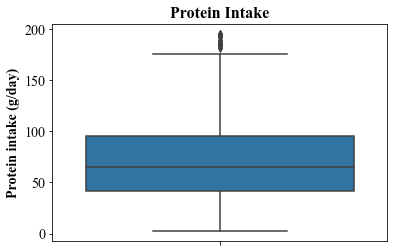

In [557]:
b3 = sns.boxplot(y=data_cleaned['ProteinAll'])
b3.set_title('Protein Intake', fontsize = 16, weight='bold')
b3.set_ylabel('Protein intake (g/day)', fontsize = 14, weight='bold')
b3.tick_params(labelsize=14)
#b3.get_figure().savefig("/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/b3.png")
#b3.get_figure().savefig("C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/b3.png")
#data_cleaned.boxplot('ProteinAll')


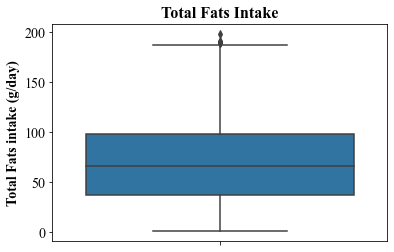

In [558]:
b4 = sns.boxplot(y=data_cleaned['TotalFatsAll'])
b4.set_title('Total Fats Intake', fontsize = 16, weight='bold')
b4.set_ylabel('Total Fats intake (g/day)', fontsize = 14, weight='bold')
b4.tick_params(labelsize=14)
#b4.get_figure().savefig("/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/b4.png")
#b4.get_figure().savefig("C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/b4.png")
#data_cleaned.boxplot('TotalFatsAll')

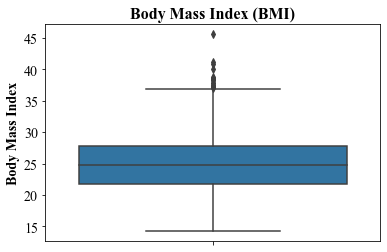

In [559]:
b5 = sns.boxplot(y=data_cleaned['BMI'])
b5.set_title('Body Mass Index (BMI)', fontsize = 16, weight='bold')
b5.set_ylabel('Body Mass Index', fontsize = 14, weight='bold')
b5.tick_params(labelsize=14)
#data_cleaned.boxplot('BMI')

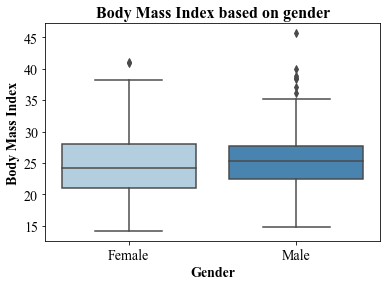

In [560]:
b6 = sns.boxplot( x=data_cleaned['Gender'], y=data_cleaned["BMI"], palette='Blues')
b6.set_title('Body Mass Index based on gender', fontsize = 16, weight='bold')
b6.set_xlabel('Gender', fontsize = 14, weight='bold')
b6.set_ylabel('Body Mass Index', fontsize = 14, weight='bold')
b6.tick_params(labelsize=14)
#b6.get_figure().savefig("/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/BMI2.png", dpi=300)
#b6.get_figure().savefig("C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/BMI2.png", dpi=300)

In [561]:
#shapiro(data_cleaned['CarbohydrateAll'])

In [562]:
data_cleaned.to_csv('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/TDS DB MD All BMI Cleaned.csv')
#data_cleaned.to_csv('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/TDS DB MD All BMI Cleaned.csv')

In [563]:
cols = ['n101', 'n102', 'n103', 'n104', 'n105', 'n106', 'n107', 'n108', 'n110', 'n111', 'n112', 'n116', 'n117', 'n199', 'n201', 'n202', 'n203', 'n204', 'n205', 'n206', 'n207', 'n208', 'n209', 'n210', 'n212', 'n213', 'n215', 'n216', 'n299', 'n301', 'n302', 'n399', 'n401', 'n402', 'n403', 'n404', 'n405', 'n406', 'n408', 'n499', 'n11102', 'n11104', 'n11106', 'n11107', 'n11108', 'n11109', 'n11110', 'n11301', 'n11305', 'n11399', 'n11501', 'n11502', 'n11503', 'n11599', 'n11600', 'n11611', 'n11612', 'n11613', 'n11614', 'n11615', 'n11616', 'n11617', 'n11702', 'n11704', 'n12101', 'n12111', 'n12201', 'n12499', 'n12501', 'n12502', 'n12503', 'n12504', 'n12505', 'n12599', 'n12603', 'n12605', 'n12606', 'n12607', 'n12609', 'n12610', 'n12699', 'n13101', 'n14102', 'n14107', 'n14201', 'n14202', 'n14203', 'n14205', 'n14206', 'n14301', 'n14311', 'n14401', 'n15100', 'n16101', 'n16102', 'n16104', 'n16111', 'n16112', 'n16113', 'n16114', 'n16116', 'n16121', 'n16123', 'n16124', 'n16131', 'n16132', 'n16133', 'n16134', 'n16135', 'n16141', 'n16142', 'n16143', 'n16399', 'n17101', 'n17102', 'n17103', 'n17123', 'n17131', 'n17132', 'n17133', 'n17134', 'n17135', 'n17136', 'n17138', 'n17140', 'n17142', 'n17144', 'n17145', 'n17146', 'n17201', 'n17202', 'n17211', 'n17212', 'n17213', 'n17215', 'n17217', 'n17220', 'n17300', 'n18102', 'n18201', 'n18202', 'n18212', 'n18220', 'n18300', 'n18401', 'n18402', 'n18405', 'n18500', 'n19103', 'n19104', 'n22201', 'n22301', 'n22303', 'n22304', 'n22305']

data_cleaned[cols] = data_cleaned[cols].apply(pd.to_numeric, errors='coerce', axis=1)
data_cleaned.dtypes

N                    int64
Q1                  object
District            object
Region              object
UrbanRural          object
                    ...   
CarbohydrateAll    float64
ProteinAll         float64
TotalFatsAll       float64
BMI                float64
BMIGroups           object
Length: 937, dtype: object

### Loop over food list and simple carb list. For each food, create a new column in the main dataframe. For each food multipy the consumption amount by its corresponding simple carb value and divide by 100 to get the result per 100g.

In [564]:
food_list= ['n102', 'n112', 'n204', 'n208', 'n210', 'n401', 'n402','n11106', 'n11107', 'n11109', 'n11110', 'n11301', 'n11305', 'n11503','n11600', 'n11614', 'n12101', 'n12111', 'n12201', 'n12501', 'n12606', 'n12607', 'n12609', 'n13101', 'n14201', 'n14205', 'n14311', 'n14401', 'n16101', 'n16102', 'n16111', 'n16112', 'n16113', 'n16116', 'n16121', 'n16131', 'n16133', 'n16141', 'n16142', 'n17101', 'n17123', 'n17131', 'n17132', 'n17133', 'n17134', 'n17135', 'n17136', 'n17138', 'n17140', 'n17142', 'n17146', 'n17201', 'n17202', 'n17211','n18102', 'n18300',  'n18500', 'n19103', 'n19104']
simplecarb_list=[0.0, 0.0, 5.8, 4.6, 5.2, 0.6, 2.7, 64.4, 67.5, 68.9, 79.2, 48.0, 57.2, 71.9, 66.9, 32.9, 0.0, 0.0, 0.0, 2.7, 16.7, 0.5, 8.3, 0.0, 5.6, 13.5, 3.1, 0.5, 11.4, 11.4, 8.7, 8.0, 11.1, 14.6, 20.8, 9.7, 10.6, 7.6, 7.0, 4.3, 1.98, 15.0, 3.8, 2.0, 2.9, 4.0, 3.4, 7.9, 6.1, 3.2, 2.4, 0.3, 51.1, 14.8, 100.0, 60.6, 23.6, 2.8, 22.0]
y=0
for x in food_list:
    data_cleaned[(str(x)+'_SimpleCarb')]=data_cleaned[x]*simplecarb_list[y]/100
    y=y+1

### Loop over food list and sugar list. For each food, create a new column in the main dataframe. For each food multipy the consumption amount by its corresponding sugar value and divide by 100 to get the result per 100g.

In [565]:
food_list= ['n11104', 'n11106','n11107', 'n11110', 'n11301', 'n11305','n11501', 'n11503','n11600', 'n11614','n11615','n11617', 'n11702', 'n14206', 'n16101', 'n16102','n16104', 'n16111', 'n16112', 'n16113', 'n16114','n16116', 'n16121', 'n16123', 'n16124', 'n16131','n16132', 'n16133', 'n16134','n16135', 'n16141', 'n16142','n16143',  'n17101','n17102','n17103', 'n17123', 'n17131', 'n17132', 'n17133', 'n17134', 'n17135', 'n17136', 'n17138', 'n17140', 'n17142', 'n17144','n17145', 'n17146', 'n17201', 'n17202', 'n18102','n18201', 'n18202', 'n18220','n18300', 'n18401', 'n18500', 'n22201']
sugar_list=[2.64, 0.4, 0.02, 0.01, 1.335, 1.84, 0.05, 5.5, 18.83, 1.43, 20.0, 0.47, 22.0, 0.43, 4.99, 9.69, 8.3, 4.13, 1.52, 5.8, 10.12, 9.5, 15.8, 19.2, 14.02, 5.57, 6.65, 4.61, 9.21, 2.59, 5.42, 2.57, 4.86, 1.19, 0.04, 3.8, 0.06, 0.08, 2.65, 1.71, 2.11, 1.43, 2.33, 2.09, 0.84, 5.76, 2.61, 0.2, 1.73, 2.41, 2.8, 100.0, 54.43, 56.72, 72.6, 46.6, 24.45, 27.94, 11.0 ]
y=0
for x in food_list:
    data_cleaned[(str(x)+'_Sugar')]=data_cleaned[x]*sugar_list[y]/100
    y=y+1

In [566]:
#Convert to numeric
data_cleaned.iloc[:, 275:315] = data_cleaned.iloc[:, 275:315].apply(pd.to_numeric, errors = 'coerce')
data_cleaned.iloc[:, 439:479] = data_cleaned.iloc[:, 439:479].apply(pd.to_numeric, errors = 'coerce')
data_cleaned.iloc[:, 603:643] = data_cleaned.iloc[:, 603:643].apply(pd.to_numeric, errors = 'coerce')
data_cleaned.iloc[:, 767:807] = data_cleaned.iloc[:, 767:807].apply(pd.to_numeric, errors = 'coerce')
data_cleaned.iloc[:, 936:996] = data_cleaned.iloc[:, 936:996].apply(pd.to_numeric, errors = 'coerce')
data_cleaned.iloc[:, 996:1054] = data_cleaned.iloc[:, 996:1054].apply(pd.to_numeric, errors = 'coerce')

#data_cleaned['n199_Energy'].describe()

In [567]:
simplecarb = data_cleaned.iloc[0:1400, 936:996]
data_cleaned['SimpleCarbAll']=simplecarb.sum(axis = 1)
data_cleaned['SimpleCarbAll']

0       309.577640
1       166.237500
2       134.327000
3       134.762000
4         0.000000
           ...    
1395     72.692820
1396     57.767520
1397    201.465484
1398    135.600820
1399    213.227784
Name: SimpleCarbAll, Length: 1286, dtype: float64

In [568]:
sugar = data_cleaned.iloc[0:1400, 996:1054]
data_cleaned['SugarAll']=sugar.sum(axis = 1)
data_cleaned['SugarAll']

0       43.617274
1        4.099600
2       30.756900
3       48.637150
4        1.036300
          ...    
1395    11.263737
1396     8.583830
1397    27.123238
1398    70.653537
1399    38.075505
Name: SugarAll, Length: 1286, dtype: float64

In [569]:
data_cleaned.columns.get_loc("n18102_Sugar")

1047

In [570]:
#data_cleaned['n11106_SimpleCarb'].dtypes

In [571]:
data_cleaned.columns[1046]

'n17202_Sugar'

In [572]:
#.columns[338]

In [573]:
#Convert to numeric starting from "n11102_Energy" to 'n22305_TotalFats' (930). Note, that 930 is not inclusive.
data_cleaned.iloc[:, 315:1054] = data_cleaned.iloc[:, 315:1054].apply(pd.to_numeric, errors = 'coerce')



In [574]:
#data_cleaned['n11102_Energy'].dtypes

# Calculate Energy received from 11 food groups and 4 mixed dishes 

### We need to speacify min_count = 1 so that the sum across all NaNs in pandas returns NaNs instead of zero


In [575]:
data_cleaned['Bread and flour based products_Energy'] = data_cleaned.iloc[:, 315:339].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_Energy'] = data_cleaned.iloc[:, 339:356].sum(axis=1, min_count = 1)
data_cleaned['Fish_Energy'] = data_cleaned.iloc[:, 356:366].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_Energy'] = data_cleaned.iloc[:, 366:375].sum(axis=1, min_count = 1)
data_cleaned['Eggs_Energy'] = data_cleaned['n14401_Energy']
data_cleaned['Fat and Oil Products_Energy'] = data_cleaned['n15100_Energy']
data_cleaned['Fruits_Energy'] = data_cleaned.iloc[:, 377:397].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_Energy'] = data_cleaned.iloc[:, [397, 398, 399, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421]].sum(axis=1, min_count = 1)
data_cleaned['Potato_Energy'] = data_cleaned['n17131_Energy']
data_cleaned['Sugar, honey, confectionery_Energy'] = data_cleaned.iloc[:, 422:434].sum(axis=1, min_count = 1)
data_cleaned['Juices_Energy'] = data_cleaned.iloc[:, 434:439].sum(axis=1, min_count = 1)

data_cleaned['Salads_Energy'] = data_cleaned.iloc[:, 275:289].sum(axis=1, min_count = 1)
data_cleaned['Soups_Energy'] = data_cleaned.iloc[:, 289:304].sum(axis=1, min_count = 1)
data_cleaned['Rice dish_Energy'] = data_cleaned.iloc[:, 304:307].sum(axis=1, min_count = 1)
data_cleaned['Scrambled Eggs_Energy'] = data_cleaned.iloc[:, 307:315].sum(axis=1, min_count = 1)

## Below is a table that shows Energy intake (kcal) received from 11 food groups and 4 mixed dishes.

In [576]:
df3 = data_cleaned[['Bread and flour based products_Energy', 
                    'Meat and meat products_Energy', 
                    'Fish_Energy', 'Milk and milk products_Energy', 
                    'Eggs_Energy', 'Fat and Oil Products_Energy', 
                    'Fruits_Energy', 'Vegetables_Energy', 'Potato_Energy', 
                    'Sugar, honey, confectionery_Energy', 'Juices_Energy', 
                   'Salads_Energy', 'Soups_Energy', 'Rice dish_Energy', 'Scrambled Eggs_Energy']].describe()
df3

,Bread and flour based products_Energy,Meat and meat products_Energy,Fish_Energy,Milk and milk products_Energy,Eggs_Energy,Fat and Oil Products_Energy,Fruits_Energy,Vegetables_Energy,Potato_Energy,"Sugar, honey, confectionery_Energy",Juices_Energy,Salads_Energy,Soups_Energy,Rice dish_Energy,Scrambled Eggs_Energy
count,1230.000000,704.000000,28.000000,836.000000,142.000000,132.000000,609.000000,705.000000,404.000000,865.000000,404.000000,392.000000,1286.000000,33.000000,238.000000
mean,831.014102,369.943306,410.558929,170.113158,133.022535,108.441364,158.439389,87.368019,140.427104,169.820882,223.897818,332.581320,60.929121,400.477273,388.530567
std,581.854908,273.760328,183.063688,121.098728,49.200193,68.088054,151.341794,142.716402,49.512674,166.167552,161.617678,170.110583,133.958104,43.626270,224.756150
min,30.480000,10.923800,66.900000,6.700000,89.100000,43.920000,3.040000,2.103570,31.950000,8.000000,18.751600,48.900000,0.000000,208.500000,41.375000
25%,370.500000,159.365625,351.225000,86.400000,89.100000,65.880000,66.987500,22.738800,142.000000,60.000000,107.800000,264.812500,0.000000,408.000000,165.500000
50%,694.357500,305.000000,401.400000,137.210000,89.100000,87.840000,116.375000,48.700300,142.000000,129.840000,200.000000,313.950000,0.000000,412.500000,383.100000
75%,1156.875750,467.517500,479.450000,233.640000,178.200000,131.760000,202.623750,93.300900,156.200000,223.070000,269.871000,327.206250,0.000000,417.000000,537.500000
max,3278.620000,2327.820000,958.900000,1004.100000,356.400000,366.000000,1400.000000,1516.500000,355.000000,1848.000000,1284.077500,1098.825000,1248.000000,417.000000,1281.300000


In [577]:
#df3.to_excel('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/Table1.xlsx')
#df3.to_excel('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/Table1.xlsx')

# Calculate Carbohydrate Received from 11 food groups and 4 mixed dishes.

In [578]:
data_cleaned['Bread and flour based products_Carbohydrate'] = data_cleaned.iloc[:, 479:503].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_Carbohydrate'] = data_cleaned.iloc[:, 503:520].sum(axis=1, min_count = 1)
data_cleaned['Fish_Carbohydrate'] = data_cleaned.iloc[:, 520:530].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_Carbohydrate'] = data_cleaned.iloc[:, 530:539].sum(axis=1, min_count = 1)
data_cleaned['Eggs_Carbohydrate'] = data_cleaned['n14401_Carbohydrate']
data_cleaned['Fat and Oil Products_Carbohydrate'] = data_cleaned['n15100_Carbohydrate']
data_cleaned['Fruits_Carbohydrate'] = data_cleaned.iloc[:, 541:561].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_Carbohydrate'] = data_cleaned.iloc[:, [561, 562, 563, 564, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585]].sum(axis=1, min_count = 1)
data_cleaned['Potato_Carbohydrate'] = data_cleaned['n17131_Carbohydrate']
data_cleaned['Sugar, honey, confectionery_Carbohydrate'] = data_cleaned.iloc[:, 586:598].sum(axis=1, min_count = 1)
data_cleaned['Juices_Carbohydrate'] = data_cleaned.iloc[:, 598:604].sum(axis=1, min_count = 1)

data_cleaned['Salads_Carbohydrate'] = data_cleaned.iloc[:, 439:453].sum(axis=1, min_count = 1)
data_cleaned['Soups_Carbohydrate'] = data_cleaned.iloc[:, 453:468].sum(axis=1, min_count = 1)
data_cleaned['Rice dish_Carbohydrate'] = data_cleaned.iloc[:, 468:471].sum(axis=1, min_count = 1)
data_cleaned['Scrambled Eggs_Carbohydrate'] = data_cleaned.iloc[:, 471:479].sum(axis=1, min_count = 1)

## Below is a table that shows Carbohydrate intake (g) received from 11 food groups and 4 mixed dishes.

In [579]:
df4 = data_cleaned[['Bread and flour based products_Carbohydrate', 
                    'Meat and meat products_Carbohydrate', 
                    'Fish_Carbohydrate', 'Milk and milk products_Carbohydrate', 
                    'Eggs_Carbohydrate', 'Fat and Oil Products_Carbohydrate', 
                    'Fruits_Carbohydrate', 'Vegetables_Carbohydrate', 'Potato_Carbohydrate', 
                    'Sugar, honey, confectionery_Carbohydrate', 'Juices_Carbohydrate', 
                   'Salads_Carbohydrate', 'Soups_Carbohydrate', 
                    'Rice dish_Carbohydrate', 'Scrambled Eggs_Carbohydrate']].describe()
df4

,Bread and flour based products_Carbohydrate,Meat and meat products_Carbohydrate,Fish_Carbohydrate,Milk and milk products_Carbohydrate,Eggs_Carbohydrate,Fat and Oil Products_Carbohydrate,Fruits_Carbohydrate,Vegetables_Carbohydrate,Potato_Carbohydrate,"Sugar, honey, confectionery_Carbohydrate",Juices_Carbohydrate,Salads_Carbohydrate,Soups_Carbohydrate,Rice dish_Carbohydrate,Scrambled Eggs_Carbohydrate
count,1230.000000,704.000000,28.0,836.000000,142.000000,132.0,609.000000,705.000000,404.000000,865.000000,584.000000,392.000000,298.000000,33.000000,238.000000
mean,122.999330,5.199911,0.0,5.826238,0.410563,0.0,33.897252,14.276427,29.074344,23.419290,39.375182,17.709892,48.812081,53.254545,6.289422
std,76.128063,17.096077,0.0,7.723430,0.151852,0.0,32.056231,22.480424,10.251216,20.908566,41.016054,9.776786,75.449839,14.960549,5.421516
min,3.600000,0.000000,0.0,0.200000,0.275000,0.0,0.000000,0.166950,6.615000,0.560000,0.800000,3.200000,2.400000,35.250000,0.875000
25%,61.987210,0.000000,0.0,0.640000,0.275000,0.0,14.480000,3.577560,29.400000,8.000000,2.800000,14.350000,13.200000,35.400000,1.750000
50%,110.304500,0.000000,0.0,2.240000,0.275000,0.0,25.480000,7.200000,29.400000,20.844000,27.100000,14.350000,18.625000,53.100000,6.900000
75%,169.869750,2.299500,0.0,10.332000,0.550000,0.0,42.993820,14.487890,32.340000,30.711250,58.000000,19.362500,33.000000,70.500000,7.250000
max,432.839000,232.000000,0.0,50.940000,1.100000,0.0,304.000000,273.547000,73.500000,240.000000,314.925000,67.250000,356.400000,70.500000,48.300000


In [580]:
#df4.to_excel('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/Table2.xlsx')
#df4.to_excel('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/Table2.xlsx')

# Calculate protein Received from 11 food groups and 4 mixed dishes.

In [581]:
data_cleaned['Bread and flour based products_Protein'] = data_cleaned.iloc[:, 643:667].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_Protein'] = data_cleaned.iloc[:, 667:684].sum(axis=1, min_count = 1)
data_cleaned['Fish_Protein'] = data_cleaned.iloc[:, 684:694].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_Protein'] = data_cleaned.iloc[:, 694:703].sum(axis=1, min_count = 1)
data_cleaned['Eggs_Protein'] = data_cleaned['n14401_Protein']
data_cleaned['Fat and Oil Products_Protein'] = data_cleaned['n15100_Protein']
data_cleaned['Fruits_Protein'] = data_cleaned.iloc[:, 705:725].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_Protein'] = data_cleaned.iloc[:, [725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749]].sum(axis=1, min_count = 1)
data_cleaned['Potato_Protein'] = data_cleaned['n17131_Protein']
data_cleaned['Sugar, honey, confectionery_Protein'] = data_cleaned.iloc[:, 750:762].sum(axis=1, min_count = 1)
data_cleaned['Juices_Protein'] = data_cleaned.iloc[:, 762:767].sum(axis=1, min_count = 1)

data_cleaned['Salads_Protein'] = data_cleaned.iloc[:, 603:617].sum(axis=1, min_count = 1)
data_cleaned['Soups_Protein'] = data_cleaned.iloc[:, 617:632].sum(axis=1, min_count = 1)
data_cleaned['Rice dish_Protein'] = data_cleaned.iloc[:, 632:635].sum(axis=1, min_count = 1)
data_cleaned['Scrambled Eggs_Protein'] = data_cleaned.iloc[:, 635:643].sum(axis=1, min_count = 1)

## Below is a table that shows Protein intake (g) received from 11 food groups and 4 mixed dishes.

In [582]:
df5 = data_cleaned[['Bread and flour based products_Protein', 
                    'Meat and meat products_Protein', 
                    'Fish_Protein', 'Milk and milk products_Protein', 
                    'Eggs_Protein', 'Fat and Oil Products_Protein', 
                    'Fruits_Protein', 'Vegetables_Protein', 'Potato_Protein', 
                    'Sugar, honey, confectionery_Protein', 'Juices_Protein', 
                   'Salads_Protein', 'Soups_Protein', 
                   'Rice dish_Protein', 'Scrambled Eggs_Protein']].describe()
df5

,Bread and flour based products_Protein,Meat and meat products_Protein,Fish_Protein,Milk and milk products_Protein,Eggs_Protein,Fat and Oil Products_Protein,Fruits_Protein,Vegetables_Protein,Potato_Protein,"Sugar, honey, confectionery_Protein",Juices_Protein,Salads_Protein,Soups_Protein,Rice dish_Protein,Scrambled Eggs_Protein
count,1230.000000,704.000000,28.000000,836.000000,142.000000,132.0,609.000000,705.000000,404.000000,865.000000,404.000000,392.000000,298.000000,33.000000,238.000000
mean,28.204594,38.580237,78.245536,9.124599,11.495775,0.0,2.448972,3.363321,3.362339,2.127520,0.704240,6.767073,10.842845,17.238636,20.398435
std,17.855039,28.909469,34.888819,6.370527,4.251869,0.0,2.716505,5.620381,1.185515,2.597841,0.688145,8.248043,6.046070,5.432588,12.908322
min,0.498000,1.075400,12.750000,0.320000,7.700000,0.0,0.079500,0.079800,0.765000,0.000000,0.000000,0.800000,1.750000,6.150000,1.687500
25%,13.000000,14.700000,66.937500,5.120000,7.700000,0.0,0.825000,0.949888,3.400000,0.045000,0.245000,2.800000,5.700000,12.300000,6.750000
50%,26.000000,29.640000,76.500000,7.680000,7.700000,0.0,1.664040,1.941800,3.400000,0.993000,0.500000,2.800000,10.671429,18.450000,18.600000
75%,39.000000,52.055625,91.375000,12.430000,15.400000,0.0,3.151925,3.899054,3.740000,3.150000,0.902000,6.850000,11.700000,24.600000,29.750000
max,96.498000,150.440000,182.750000,37.460000,30.800000,0.0,28.000000,91.205450,8.500000,28.000000,4.500000,78.400000,42.400000,24.600000,68.750000


In [583]:
#df5.to_excel('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/Table3.xlsx')
#df5.to_excel('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/Table3.xlsx')

# Calculate Total Fats Received from 11 food groups.

In [584]:
data_cleaned['Bread and flour based products_TotalFats'] = data_cleaned.iloc[:, 807:831].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_TotalFats'] = data_cleaned.iloc[:, 831:848].sum(axis=1, min_count = 1)
data_cleaned['Fish_TotalFats'] = data_cleaned.iloc[:, 848:858].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_TotalFats'] = data_cleaned.iloc[:, 858:867].sum(axis=1, min_count = 1)
data_cleaned['Eggs_TotalFats'] = data_cleaned['n14401_TotalFats']
data_cleaned['Fat and Oil Products_TotalFats'] = data_cleaned['n15100_TotalFats']
data_cleaned['Fruits_TotalFats'] = data_cleaned.iloc[:, 869:889].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_TotalFats'] = data_cleaned.iloc[:, [889, 890, 891, 892, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913]].sum(axis=1, min_count = 1)
data_cleaned['Potato_TotalFats'] = data_cleaned['n17131_TotalFats']
data_cleaned['Sugar, honey, confectionery_TotalFats'] = data_cleaned.iloc[:, 914:926].sum(axis=1, min_count = 1)
data_cleaned['Juices_TotalFats'] = data_cleaned.iloc[:, 926:931].sum(axis=1, min_count = 1)

data_cleaned['Salads_TotalFats'] = data_cleaned.iloc[:, 767:781].sum(axis=1, min_count = 1)
data_cleaned['Soups_TotalFats'] = data_cleaned.iloc[:, 781:796].sum(axis=1, min_count = 1)
data_cleaned['Rice dish_TotalFats'] = data_cleaned.iloc[:, 796:799].sum(axis=1, min_count = 1)
data_cleaned['Scrambled Eggs_TotalFats'] = data_cleaned.iloc[:, 799:807].sum(axis=1, min_count = 1)

## Below is a table that shows Total Fats intake (g) received from 11 food groups.

In [585]:
df6 = data_cleaned[['Bread and flour based products_TotalFats', 
                    'Meat and meat products_TotalFats', 
                    'Fish_TotalFats', 'Milk and milk products_TotalFats', 
                    'Eggs_TotalFats', 'Fat and Oil Products_TotalFats', 
                    'Fruits_TotalFats', 'Vegetables_TotalFats', 'Potato_TotalFats', 
                    'Sugar, honey, confectionery_TotalFats', 'Juices_TotalFats',
                   'Salads_TotalFats', 'Soups_TotalFats', 
                    'Rice dish_TotalFats', 'Scrambled Eggs_TotalFats']].describe()
df6

,Bread and flour based products_TotalFats,Meat and meat products_TotalFats,Fish_TotalFats,Milk and milk products_TotalFats,Eggs_TotalFats,Fat and Oil Products_TotalFats,Fruits_TotalFats,Vegetables_TotalFats,Potato_TotalFats,"Sugar, honey, confectionery_TotalFats",Juices_TotalFats,Salads_TotalFats,Soups_TotalFats,Rice dish_TotalFats,Scrambled Eggs_TotalFats
count,1230.000000,704.000000,28.000000,836.000000,142.000000,132.000000,609.000000,705.000000,404.000000,865.000000,404.000000,392.000000,298.000000,33.000000,238.000000
mean,24.532122,21.283627,10.862321,12.130165,9.442958,12.044102,0.753820,1.615234,0.593354,7.695420,0.182296,26.600351,15.914370,13.615909,30.230588
std,28.666160,19.011955,4.843389,9.346032,3.492606,7.562239,1.775363,5.600816,0.209208,9.446773,0.208922,15.664740,13.325973,4.133863,18.547895
min,0.078000,0.679200,1.770000,0.344000,6.325000,4.878000,0.000000,0.019500,0.135000,0.000000,0.000000,2.700000,0.400000,4.950000,3.000000
25%,4.250000,7.800000,9.292500,6.900000,6.325000,7.317000,0.307260,0.276060,0.600000,0.000000,0.000000,14.000000,6.000000,9.900000,12.000000
50%,10.200000,14.560000,10.620000,10.080000,6.325000,9.756000,0.500000,0.607400,0.600000,4.650000,0.245000,28.000000,14.228571,14.550000,30.600000
75%,43.842000,30.128000,12.685000,17.031000,12.650000,14.634000,0.871500,1.178900,0.660000,9.937500,0.279030,28.000000,30.000000,19.200000,43.250000
max,158.160000,105.056500,25.370000,91.860000,25.300000,40.650000,41.561000,80.010000,1.500000,88.000000,1.116120,98.000000,96.000000,19.200000,102.650000


In [586]:
#df6.to_excel('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/Table4.xlsx')
#df6.to_excel('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/Table4.xlsx')

# Calculate SimpleCarb received from 11 food groups and 4 mixed dishes 


In [587]:
data_cleaned['Bread and flour based products_SimpleCarb'] = data_cleaned.iloc[:, 944:953].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_SimpleCarb'] = data_cleaned.iloc[:, 953:960].sum(axis=1, min_count = 1)
data_cleaned['Fish_SimpleCarb'] = data_cleaned.iloc[:, 960:961].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_SimpleCarb'] = data_cleaned.iloc[:, 961:964].sum(axis=1, min_count = 1)
data_cleaned['Eggs_SimpleCarb'] = data_cleaned['n14401_SimpleCarb']
#data_cleaned['Fat and Oil Products_TotalFats'] = data_cleaned['n15100_TotalFats']
data_cleaned['Fruits_SimpleCarb'] = data_cleaned.iloc[:, 965:976].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_SimpleCarb'] = data_cleaned.iloc[:, [976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990]].sum(axis=1, min_count = 1)
data_cleaned['Potato_SimpleCarb'] = data_cleaned['n17131_SimpleCarb']
data_cleaned['Sugar, honey, confectionery_SimpleCarb'] = data_cleaned.iloc[:, 991:996].sum(axis=1, min_count = 1)
#data_cleaned['Juices_SimpleCarb'] = data_cleaned.iloc[:, 926:931].sum(axis=1, min_count = 1)

data_cleaned['Salads_SimpleCarb'] = data_cleaned.iloc[:, 937:939].sum(axis=1, min_count = 1)
data_cleaned['Soups_SimpleCarb'] = data_cleaned.iloc[:, 939:942].sum(axis=1, min_count = 1)
#data_cleaned['Rice dish_SimpleCarb'] = data_cleaned.iloc[:, 796:799].sum(axis=1, min_count = 1)
data_cleaned['Scrambled Eggs_SimpleCarb'] = data_cleaned.iloc[:, 942:944].sum(axis=1, min_count = 1)

## Below is a table that shows Simple Carb intake (g) received from 11 food groups. 

In [588]:
df7 = data_cleaned[['Bread and flour based products_SimpleCarb', 
                    'Meat and meat products_SimpleCarb', 
                    'Fish_SimpleCarb', 'Milk and milk products_SimpleCarb', 
                    'Eggs_SimpleCarb',  
                    'Fruits_SimpleCarb', 'Vegetables_SimpleCarb', 'Potato_SimpleCarb', 
                    'Sugar, honey, confectionery_SimpleCarb', 
                   'Salads_TotalFats', 'Soups_SimpleCarb', 
                    'Scrambled Eggs_SimpleCarb']].describe()
df7

,Bread and flour based products_SimpleCarb,Meat and meat products_SimpleCarb,Fish_SimpleCarb,Milk and milk products_SimpleCarb,Eggs_SimpleCarb,Fruits_SimpleCarb,Vegetables_SimpleCarb,Potato_SimpleCarb,"Sugar, honey, confectionery_SimpleCarb",Salads_TotalFats,Soups_SimpleCarb,Scrambled Eggs_SimpleCarb
count,1147.000000,556.000000,4.0,265.000000,142.000000,496.000000,830.000000,404.000000,804.000000,392.000000,42.000000,114.000000
mean,124.746542,3.981833,0.0,11.657083,0.410563,35.842501,20.333651,29.667698,21.323887,26.600351,17.323810,4.026842
std,83.434853,12.045996,0.0,7.924778,0.151852,32.973035,16.280233,10.460424,19.234064,15.664740,4.789359,3.354228
min,6.578000,0.000000,0.0,0.124000,0.275000,1.901200,0.031482,6.750000,0.392000,2.700000,9.200000,0.750000
25%,58.320000,0.000000,0.0,3.920000,0.275000,17.513820,6.270760,30.000000,8.000000,14.000000,14.700000,1.500000
50%,108.000000,0.000000,0.0,14.112000,0.275000,26.735820,15.642300,30.000000,17.003000,28.000000,17.400000,1.500000
75%,168.000000,1.539000,0.0,14.112000,0.550000,43.442900,32.694880,33.000000,28.512000,28.000000,17.400000,8.100000
max,559.965000,133.600000,0.0,41.112000,1.100000,304.000000,81.237560,75.000000,236.800000,98.000000,39.900000,16.200000


In [592]:
df7.to_excel('/Users/sedastepanyan/Downloads/Table7.xlsx')

# Calculate Sugar received from 11 food groups and 4 mixed dishes 


In [589]:
data_cleaned['Bread and flour based products_Sugar'] = data_cleaned.iloc[:, 996:1006].sum(axis=1, min_count = 1)
#data_cleaned['Meat and meat products_SimpleCarb'] = data_cleaned.iloc[:, 953:960].sum(axis=1, min_count = 1)
#data_cleaned['Fish_SimpleCarb'] = data_cleaned.iloc[:, 960:961].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_Sugar'] = data_cleaned.iloc[:, 1006:1010].sum(axis=1, min_count = 1)
#data_cleaned['Eggs_SimpleCarb'] = data_cleaned['n14401_SimpleCarb']
#data_cleaned['Fat and Oil Products_TotalFats'] = data_cleaned['n15100_TotalFats']
data_cleaned['Fruits_Sugar'] = data_cleaned.iloc[:, 1010:1029].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_Sugar'] = data_cleaned.iloc[:, [1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046]].sum(axis=1, min_count = 1)
#data_cleaned['Potato_SimpleCarb'] = data_cleaned['n17131_SimpleCarb']
data_cleaned['Sugar, honey, confectionery_Sugar'] = data_cleaned.iloc[:, 1047:1054].sum(axis=1, min_count = 1)
#data_cleaned['Juices_SimpleCarb'] = data_cleaned.iloc[:, 926:931].sum(axis=1, min_count = 1)

#data_cleaned['Salads_SimpleCarb'] = data_cleaned.iloc[:, 937:939].sum(axis=1, min_count = 1)
#data_cleaned['Soups_SimpleCarb'] = data_cleaned.iloc[:, 939:942].sum(axis=1, min_count = 1)
#data_cleaned['Rice dish_SimpleCarb'] = data_cleaned.iloc[:, 796:799].sum(axis=1, min_count = 1)
#data_cleaned['Scrambled Eggs_SimpleCarb'] = data_cleaned.iloc[:, 942:944].sum(axis=1, min_count = 1)

## Below is a table that shows Sugar intake (g) received from 11 food groups. 

In [590]:
df8 = data_cleaned[['Bread and flour based products_Sugar', 
                     'Milk and milk products_Sugar',  
                    'Fruits_Sugar', 'Vegetables_Sugar', 
                    'Sugar, honey, confectionery_Sugar']].describe()
df8

,Bread and flour based products_Sugar,Milk and milk products_Sugar,Fruits_Sugar,Vegetables_Sugar,"Sugar, honey, confectionery_Sugar"
count,1169.000000,116.000000,604.000000,830.000000,846.000000
mean,9.753619,6.920331,20.591018,3.965698,22.806065
std,15.030616,17.508081,20.941437,4.169129,20.921817
min,0.003900,0.258000,0.492100,0.000954,1.589250
25%,1.335000,1.410000,7.666137,0.176000,8.000000
50%,2.696616,1.410000,15.332274,2.838112,17.497500
75%,8.088750,1.598000,27.021137,6.196147,30.650625
max,105.257800,108.000000,216.800000,24.265020,271.520000


In [593]:
df8.to_excel('/Users/sedastepanyan/Downloads/Table8.xlsx')

## Below is a table that shows macronutrient intake

In [591]:
df9 = data_cleaned[['EnergyAll', 
                    'CarbohydrateAll', 
                    'ProteinAll', 
                    'TotalFatsAll', 
                    'SimpleCarbAll', 
                   'SugarAll']].describe()
df9

,EnergyAll,CarbohydrateAll,ProteinAll,TotalFatsAll,SimpleCarbAll,SugarAll
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,1738.787144,209.573129,71.506149,69.918826,156.634126,36.724086
std,788.235467,102.825203,38.626564,41.435756,95.564502,31.215442
min,33.320000,2.283000,2.150000,0.392000,0.000000,0.000000
25%,1173.757700,133.960855,41.604905,36.618825,86.000000,13.178608
50%,1643.244800,194.915000,65.444522,65.613440,143.272540,30.432950
75%,2270.204250,274.217090,95.352647,97.556335,211.734453,52.876173
max,4061.293550,522.910520,195.259720,198.569000,635.964000,271.520000


In [ ]:
df2 = data_cleaned.groupby('Gender')['EnergyAll'].describe()
df2

## Conduct T test to see if the Energy intake is statistically different between male and female.

In [ ]:
A=data_cleaned[data_cleaned['Gender']=='Male']['EnergyAll'].values.tolist()
B=data_cleaned[data_cleaned['Gender']=='Female']['EnergyAll'].values.tolist()

In [ ]:
from scipy import stats
t_check=stats.ttest_ind(A,B)
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('Energy intake is statistically different between male and female')

## Conduct Mann-Whitney U test to see if the Energy intake is statistically different between male and female.

In [ ]:
stat, p_value = stats.mannwhitneyu(A, B)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

In [ ]:
#data_cleaned.to_csv('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/TDS DB MD All BMI Cleaned.csv')
data_cleaned.to_csv('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/TDS DB MD All BMI Cleaned.csv')

## Below is the consumption of 11 food groups and mixed dishes.

In [ ]:
#Convert to numeric starting from "n11102_Energy" to 'n22305_TotalFats' (930). Note, that 930 is not inclusive.
data_cleaned.iloc[:, 63:234] = data_cleaned.iloc[:, 63:234].apply(pd.to_numeric, errors = 'coerce')

#Convert to numeric starting from "n101" to 'n499' (930). Note, that 61 is not inclusive.
data_cleaned.iloc[:, 22:62] = data_cleaned.iloc[:, 22:62].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
#Food groups
data_cleaned['Bread and flour based products_Intake'] = data_cleaned.iloc[:, [63, 64, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91]].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products_Intake'] = data_cleaned.iloc[:, [93, 95, 97, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 115, 116]].sum(axis=1, min_count = 1)
data_cleaned['Fish_Intake'] = data_cleaned.iloc[:, 117:127].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products_Intake'] = data_cleaned.iloc[:, [127, 129, 131, 132, 133, 134, 135, 137, 139, 142]].sum(axis=1, min_count = 1)
data_cleaned['Eggs_Intake'] = data_cleaned['n14401']
data_cleaned['Fat and Oil Products_Intake'] = data_cleaned['n15100']
data_cleaned['Fruits_Intake'] = data_cleaned.iloc[:, [146, 147, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 171, 172]].sum(axis=1, min_count = 1)
data_cleaned['Fruits_Intake (Excluding watermelon and melon)'] = data_cleaned.iloc[:, [146, 147, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 166, 171, 172]].sum(axis=1, min_count = 1)
data_cleaned['Fruits_and_Vegetables_Intake (Excluding watermelon and melon)'] = data_cleaned.iloc[:, [146, 147, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 166, 171, 172,173, 174, 176, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196, 197, 199, 201, 204, 205]].sum(axis=1, min_count = 1)
data_cleaned['Fruits_and_Vegetables_Intake (With watermelon and melon)'] = data_cleaned.iloc[:, [146, 147, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 171, 172,173, 174, 176, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196, 197, 199, 201, 204, 205]].sum(axis=1, min_count = 1)
data_cleaned['Vegetables_Intake'] = data_cleaned.iloc[:, [172, 173, 174, 176, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196, 197, 199, 201, 204, 205]].sum(axis=1, min_count = 1)
data_cleaned['Potato_Intake'] = data_cleaned['n17131']
data_cleaned['Sugar, honey, confectionery_Intake'] = data_cleaned.iloc[:, [206, 207, 208, 210, 211, 212, 213, 214, 216, 217, 218, 219, 229]].sum(axis=1, min_count = 1)
data_cleaned['Juices_Intake'] = data_cleaned.iloc[:, 229:234].sum(axis=1, min_count = 1)

In [ ]:
#Mixed Dishes
data_cleaned['Salads'] = data_cleaned.iloc[:, 22:35].sum(axis=1, min_count = 1)
data_cleaned['Soups'] = data_cleaned.iloc[:, 36:50].sum(axis=1, min_count = 1)
data_cleaned['Rice dish'] = data_cleaned.iloc[:, 51:53].sum(axis=1, min_count = 1) 
data_cleaned['Scrambled Eggs'] = data_cleaned.iloc[:, 54:61].sum(axis=1, min_count = 1)

In [ ]:
#data_cleaned.to_csv('/Users/sedastepanyan/Downloads/20-01-2023_11-56-18/TDS DB MD All BMI Cleaned Consumption.csv')
data_cleaned.to_csv('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/TDS DB MD All BMI Cleaned Consumnption.csv')

In [ ]:
df77 = data_cleaned[['Bread and flour based products_Intake', 
                    'Meat and meat products_Intake', 
                    'Fish_Intake', 'Milk and milk products_Intake', 
                    'Eggs_Intake', 'Fat and Oil Products_Intake', 
                    'Fruits_Intake', 'Vegetables_Intake', 'Potato_Intake', 
                    'Sugar, honey, confectionery_Intake', 'Juices_Intake', 
                    'Fruits_Intake (Excluding watermelon and melon)', 
                   'Fruits_and_Vegetables_Intake (Excluding watermelon and melon)',
                   'Fruits_and_Vegetables_Intake (With watermelon and melon)']].describe()
df77

In [ ]:
df_md = data_cleaned[['Salads', 
                    'Soups', 
                    'Rice dish', 
                    'Scrambled Eggs']].describe()
df_md

In [ ]:
data_cleaned.iloc[:, 36:50].describe()

In [ ]:
column = data_cleaned['Fruits_and_Vegetables_Intake (Excluding watermelon and melon)']
count = column[column >= 400].count()
count

column = data_cleaned['Fruits_and_Vegetables_Intake (With watermelon and melon)']
count = column[column >= 400].count()
count

count_new = len(data_cleaned[(data_cleaned['Fruits_and_Vegetables_Intake (Excluding watermelon and melon)']>=400) & 
         (data_cleaned['Fruits_and_Vegetables_Intake (Excluding watermelon and melon)']<=500)])
count_new

In [ ]:
df88 = data_cleaned[['Bread and flour based products_Intake', 
                    'Meat and meat products_Intake', 
                    'Fish_Intake', 'Milk and milk products_Intake', 
                    'Eggs_Intake', 'Fat and Oil Products_Intake', 
                    'Fruits_Intake', 'Vegetables_Intake', 'Potato_Intake', 
                    'Sugar, honey, confectionery_Intake', 'Juices_Intake']]
#df88

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=df8, orient = 'h', ci = None)

ax.set_title('Consumption of main food groups (g) ')
ax.set_xlabel('Consumption (g)')


In [ ]:
# This is a copy of the above calculation just to rename the food groups...
data_cleaned['Bread and flour based products'] = data_cleaned.iloc[:, [63, 64, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91]].sum(axis=1, min_count = 1)
data_cleaned['Meat and meat products'] = data_cleaned.iloc[:, [93, 95, 97, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 115, 116]].sum(axis=1, min_count = 1)
data_cleaned['Fish'] = data_cleaned.iloc[:, 117:127].sum(axis=1, min_count = 1) 
data_cleaned['Milk and milk products'] = data_cleaned.iloc[:, [127, 129, 131, 132, 133, 134, 135, 137, 139, 142]].sum(axis=1, min_count = 1)
data_cleaned['Eggs'] = data_cleaned['n14401']
data_cleaned['Fat and Oil Products'] = data_cleaned['n15100']
data_cleaned['Fruits'] = data_cleaned.iloc[:, [146, 147, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 171, 172]].sum(axis=1, min_count = 1)
data_cleaned['Vegetables'] = data_cleaned.iloc[:, [172, 173, 174, 176, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196, 197, 199, 201, 204, 205]].sum(axis=1, min_count = 1)
data_cleaned['Potatoes'] = data_cleaned['n17131']
data_cleaned['Sugar, honey, confectionery'] = data_cleaned.iloc[:, [206, 207, 208, 210, 211, 212, 213, 214, 216, 217, 218, 219, 229]].sum(axis=1, min_count = 1)
data_cleaned['Juices'] = data_cleaned.iloc[:, 229:234].sum(axis=1, min_count = 1)

In [ ]:
# This is a copy of the above calculation just to rename the food groups...
df99 = data_cleaned[['Bread and flour based products', 
                    'Meat and meat products', 
                    'Fish', 'Milk and milk products', 
                    'Eggs', 'Fat and Oil Products', 
                    'Fruits', 'Vegetables', 'Potatoes', 
                    'Sugar, honey, confectionery', 'Juices',
                    'Salads', 'Soups', 'Rice dish', 'Scrambled Eggs']]
#df99

In [ ]:
# This is a copy of the above calculation just to rename the food groups...
plt.rcParams.update({'font.size': 14})
#plt.figure(figsize=(15,8))
ax = sns.barplot(data=df9, orient = 'h', ci = None)

ax.set_title('Consumption of food groups and mixed dishes (g) ', weight='bold')
ax.set_xlabel('Consumption (g)',fontsize = 14, weight='bold')


In [ ]:
figure = ax.get_figure()    
figure.savefig('Consumption of main food groups and mixed dishes (g).png', dpi=400, bbox_inches='tight')

In [ ]:
df10 = data_cleaned[[
                     
'n12101', #beef and veal
'n12111', #pork
'n12201', #chicken meat
'n12499', #khash
'n12501', #sausages
'n12502', 
'n12503',
'n12504',
'n12505', #sausages
'n12599',
'n12603',
'n12605', #meat cutlets
'n12606',
'n12607',
'n12609',
'n12610',
'n12699'
]].describe()
df10                 

In [ ]:
df11 = data_cleaned[['n11501', 'n11502', 'n11503', 'n11599']].describe()
df11

In [ ]:
df12 = data_cleaned[['n11600', 'n11611', 'n11612', 'n11613', 'n11614', 'n11615', 'n11616', 'n11617']].describe()
df12

In [ ]:
df13 = data_cleaned[['n18102', 'n18201', 'n18202', 'n18212', 'n18220', 'n18300', 'n18401', 'n18402', 'n18405', 'n18500', 'n19103', 'n19104']].describe()
df13

In [ ]:
df14 = data_cleaned[['n11102', 'n11104','n11107', 'n11110']].describe()
df14                 #groat,    oat,    buckwheat, rice


In [ ]:
data_cleaned['Cereal_Intake'] = data_cleaned.iloc[:, [63, 64, 67, 70]].sum(axis=1, min_count = 1)
data_cleaned['Cereal_Intake'].describe()

In [ ]:
data.columns.get_loc("n11110")

## Create Age Groups

In [ ]:
data_cleaned['Age_Groups'] = pd.cut(x=data_cleaned['YearOfBirth'], bins=[1941, 1942, 1952, 1962, 1972, 1982, 1992, 2003], labels=['80+', '70-79', '60-69', '50-59', '40-49', '30-39', '18-29'])

In [ ]:
data_cleaned[['YearOfBirth', 'Age_Groups']]

In [ ]:
data_cleaned.groupby(['Gender', 'Age_Groups'])['EnergyAll'].mean()
data_cleaned.groupby(['Gender', 'Age_Groups'])['EnergyAll'].quantile([0.75])

In [ ]:
data_cleaned['Weight']= pd.to_numeric(data_cleaned['Weight'], errors='coerce')
data_cleaned['Weight'].describe()


In [ ]:
weight_by_gender = data_cleaned.groupby('Gender')['Weight'].mean()
weight_by_gender

In [ ]:
protein_by_gender = data_cleaned.groupby('Gender')['ProteinAll'].mean()
protein_by_gender

In [ ]:
# N of respondents who meet the Reference Intake range for carbohydrates set by EFSA (45-60 E%)
count_new = len(data_cleaned[(data_cleaned['CarbohydrateAll']>=195.525) & 
         (data_cleaned['CarbohydrateAll']<=260.7)])
count_new

In [ ]:
# N of respondents who receive equal or more than the AR for proteins set by EFSA (0.66g/kg bw)
column = data_cleaned['ProteinAll']/data_cleaned['Weight']
count = column[column >= 0.66].count()
count

In [ ]:
# N of respondents who meet the Reference Intake range for total fats set by EFSA (45-60 E%)
count_new = len(data_cleaned[(data_cleaned['TotalFatsAll']>=38.62) & 
         (data_cleaned['TotalFatsAll']<=67.5)])
count_new

In [ ]:
#Calculate Nutrient intake per 124 food item, concat all together vertically and save in Table 5
mean_energy_intake_for_each_food = data_cleaned.iloc[:, 315:439].mean().reset_index()
mean_carb_intake_for_each_food = data_cleaned.iloc[:, 479:604].mean().reset_index()
mean_protein_intake_for_each_food = data_cleaned.iloc[:, 643:767].mean().reset_index()
mean_totalfat_intake_for_each_food = data_cleaned.iloc[:, 807:931].mean().reset_index()

mean_nutrient_intake_for_each_food = pd.concat([mean_energy_intake_for_each_food, mean_carb_intake_for_each_food, mean_protein_intake_for_each_food, mean_totalfat_intake_for_each_food], ignore_index = True)
mean_nutrient_intake_for_each_food.to_excel('C:/Users/User/Desktop/Seda/Our Articles/Nutrient Intake Article 24HR/Database/Tables, figures/Table5_Nutrient intake per 124 food item.xlsx')

In [ ]:
data_cleaned['n12101'].describe()